In [619]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

In [620]:
covid_data = pd.read_csv("covid_data_23 March.csv", parse_dates = True)
covid_data.head(10)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,ABW,Aruba,13/3/2020,2,2,0,0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,20/3/2020,4,2,0,0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,24/3/2020,12,8,0,0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,25/3/2020,17,5,0,0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,26/3/2020,19,2,0,0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
5,ABW,Aruba,27/3/2020,28,9,0,0,262.256,84.296,0.0,0.0,NaN,NaN,NaN,NaN,NaN
6,ABW,Aruba,28/3/2020,28,0,0,0,262.256,0.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
7,ABW,Aruba,29/3/2020,28,0,0,0,262.256,0.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
8,ABW,Aruba,30/3/2020,50,22,0,0,468.314,206.058,0.0,0.0,NaN,NaN,NaN,NaN,NaN
9,ABW,Aruba,1/4/2020,55,5,0,0,515.145,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN


## Basic Health check of Data

In [621]:
print("Size of the data : " , covid_data.shape , covid_data.size)
print("Check for any null values : \n" , covid_data.isnull().sum())
print("Check for data type of all columns : \n", covid_data.dtypes)

Size of the data :  (12662, 16) 202592
Check for any null values : 
 iso_code                        0
location                        0
date                            0
total_cases                     0
new_cases                       0
total_deaths                    0
new_deaths                      0
total_cases_per_million       200
new_cases_per_million         200
total_deaths_per_million      200
new_deaths_per_million        200
total_tests                  9846
new_tests                   10160
total_tests_per_thousand     9846
new_tests_per_thousand      10159
tests_units                  9846
dtype: int64
Check for data type of all columns : 
 iso_code                     object
location                     object
date                         object
total_cases                   int64
new_cases                     int64
total_deaths                  int64
new_deaths                    int64
total_cases_per_million     float64
new_cases_per_million       float64
total_death

In [622]:
# Drop total cases, deaths and new cases per million columns. 
covid_data.drop( ["total_cases_per_million", "new_cases_per_million", "total_deaths_per_million"] , 1, inplace = True)
covid_data.head(10)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,ABW,Aruba,13/3/2020,2,2,0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,20/3/2020,4,2,0,0,0.0,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,24/3/2020,12,8,0,0,0.0,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,25/3/2020,17,5,0,0,0.0,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,26/3/2020,19,2,0,0,0.0,NaN,NaN,NaN,NaN,NaN
5,ABW,Aruba,27/3/2020,28,9,0,0,0.0,NaN,NaN,NaN,NaN,NaN
6,ABW,Aruba,28/3/2020,28,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
7,ABW,Aruba,29/3/2020,28,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
8,ABW,Aruba,30/3/2020,50,22,0,0,0.0,NaN,NaN,NaN,NaN,NaN
9,ABW,Aruba,1/4/2020,55,5,0,0,0.0,NaN,NaN,NaN,NaN,NaN


## India's Analysis

In [623]:
#filter India's data
india_data = covid_data[covid_data["location"] == "India"]
india_data

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
5481,IND,India,31/12/2019,0,0,0,0,0.000,NaN,NaN,NaN,NaN,NaN
5482,IND,India,1/1/2020,0,0,0,0,0.000,NaN,NaN,NaN,NaN,NaN
5483,IND,India,2/1/2020,0,0,0,0,0.000,NaN,NaN,NaN,NaN,NaN
5484,IND,India,3/1/2020,0,0,0,0,0.000,NaN,NaN,NaN,NaN,NaN
5485,IND,India,4/1/2020,0,0,0,0,0.000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5590,IND,India,19/4/2020,15712,1334,507,27,0.020,401586.0,29463.0,0.290,0.021,samples tested
5591,IND,India,20/4/2020,17265,1553,543,36,0.026,NaN,NaN,NaN,NaN,NaN
5592,IND,India,21/4/2020,18600,1335,590,47,0.034,462621.0,NaN,0.334,NaN,samples tested
5593,IND,India,22/4/2020,19984,1384,640,50,0.036,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Total cases')

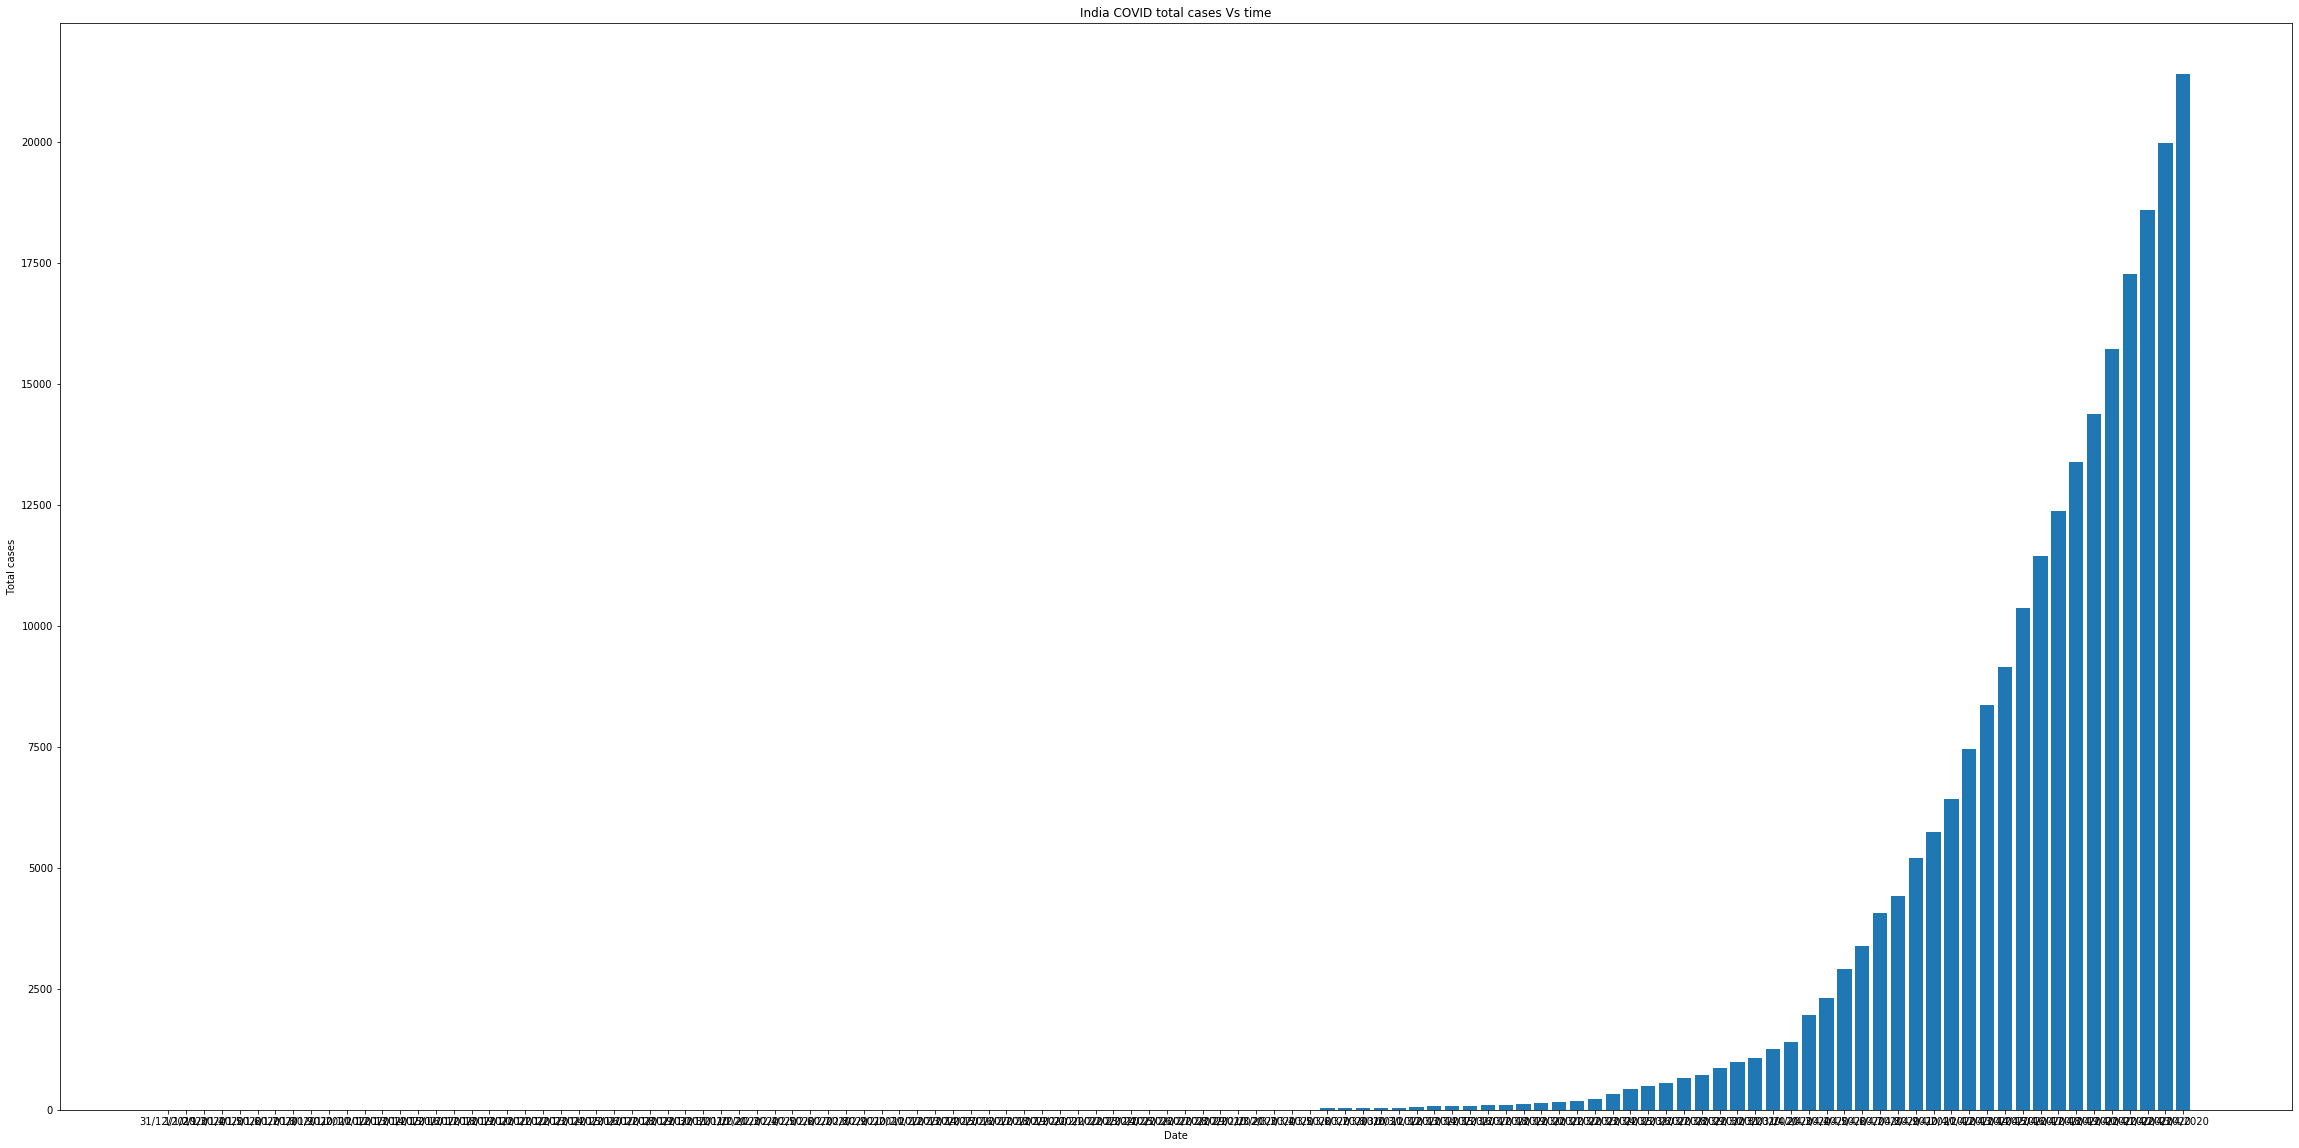

In [624]:
plt.figure(figsize= (40,20))
plt.bar(x = india_data["date"],
             height = india_data["total_cases"],
              linestyle = "solid");
plt.gcf().autofmt_xdate  
plt.title("India COVID total cases Vs time")
plt.xlabel("Date")
plt.ylabel("Total cases")

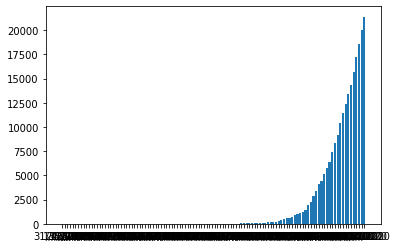

In [410]:
fig, ax = plt.subplots()
ax.bar(x = india_data["date"],
             height = india_data["total_cases"]);

In [625]:
#convert date into datetime format
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates
from datetime import date
covid_data_2 = covid_data
covid_data_2["date"] = pd.to_datetime(covid_data_2["date"])
covid_data_2.head(15)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,ABW,Aruba,2020-03-13,2,2,0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,0.0,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,0.0,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,0.0,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,0.0,NaN,NaN,NaN,NaN,NaN
5,ABW,Aruba,2020-03-27,28,9,0,0,0.0,NaN,NaN,NaN,NaN,NaN
6,ABW,Aruba,2020-03-28,28,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
7,ABW,Aruba,2020-03-29,28,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
8,ABW,Aruba,2020-03-30,50,22,0,0,0.0,NaN,NaN,NaN,NaN,NaN
9,ABW,Aruba,2020-01-04,55,5,0,0,0.0,NaN,NaN,NaN,NaN,NaN


In [626]:
covid_data_2 = covid_data_2.set_index('date')
covid_data_2.index

DatetimeIndex(['2020-03-13', '2020-03-20', '2020-03-24', '2020-03-25',
               '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
               '2020-03-30', '2020-01-04',
               ...
               '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
               '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21',
               '2020-04-22', '2020-04-23'],
              dtype='datetime64[ns]', name='date', length=12662, freq=None)

In [627]:
covid_data_2["Year"] = covid_data_2.index.year
covid_data_2["Month"] = covid_data_2.index.month
covid_data_2["Date"] = covid_data_2.index.day
covid_data_2.head()

,iso_code,location,total_cases,new_cases,total_deaths,new_deaths,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units,Year,Month,Date
date,,,,,,,,,,,,,,,
2020-03-13,ABW,Aruba,2,2,0,0,0.0,NaN,NaN,NaN,NaN,NaN,2020,3,13
2020-03-20,ABW,Aruba,4,2,0,0,0.0,NaN,NaN,NaN,NaN,NaN,2020,3,20
2020-03-24,ABW,Aruba,12,8,0,0,0.0,NaN,NaN,NaN,NaN,NaN,2020,3,24
2020-03-25,ABW,Aruba,17,5,0,0,0.0,NaN,NaN,NaN,NaN,NaN,2020,3,25
2020-03-26,ABW,Aruba,19,2,0,0,0.0,NaN,NaN,NaN,NaN,NaN,2020,3,26


## Let's plot Country wise analysis

In [628]:
covid = pd.DataFrame(covid_data, columns = ["location", "total_cases", "total_deaths"] )
covid

,location,total_cases,total_deaths
0,Aruba,2,0
1,Aruba,4,0
2,Aruba,12,0
3,Aruba,17,0
4,Aruba,19,0
...,...,...,...
12657,Zimbabwe,25,3
12658,Zimbabwe,25,3
12659,Zimbabwe,25,3
12660,Zimbabwe,28,3


In [632]:
a = covid.groupby("location").sum()

Text(0.5, 0, 'Country')

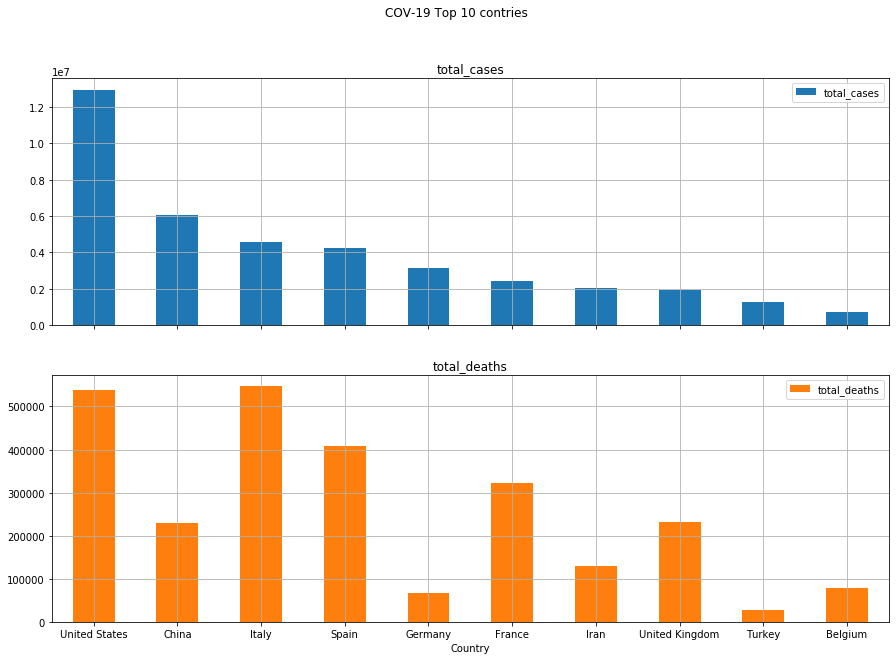

In [633]:
# 1. Grouped the df by location - groupby function
# 2. Summation of total cases and deaths - sum()
# 3. Sorted values by total cases in descending order - sort_values
# 4. Plot the bar graph using df.plot

covid.groupby("location").sum().sort_values(by = "total_cases", axis = 0, ascending = False).head(10).plot(kind = "bar", subplots = True, figsize = (15,10), title = "COV-19 Top 10 contries", grid = True, rot = 0)
plt.xlabel("Country")

Text(0.5, 0, 'Country')

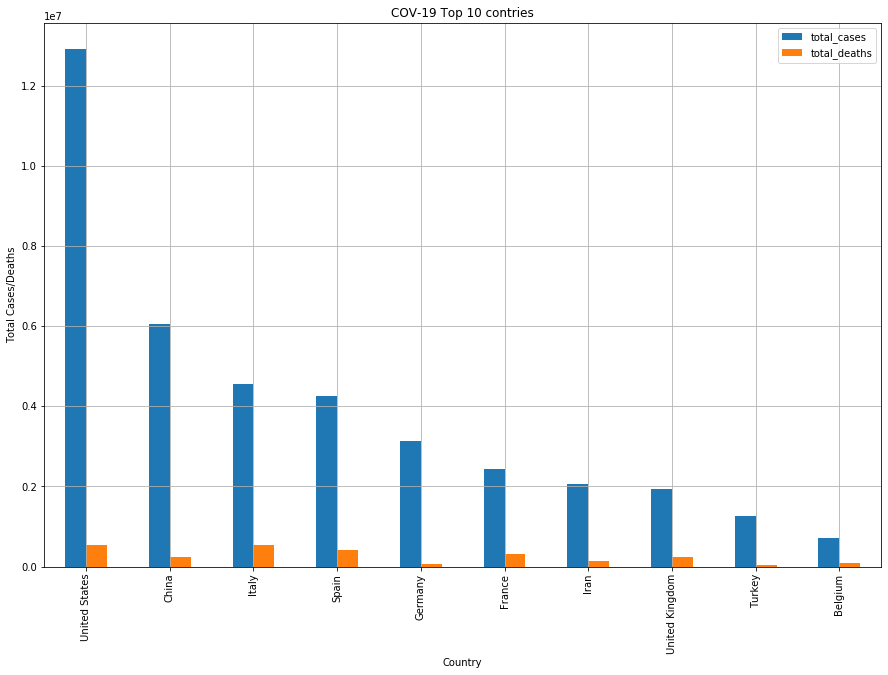

In [634]:
covid.groupby("location").sum().sort_values(by = "total_cases", axis = 0, ascending = False).head(10).plot(kind = "bar", figsize = (15,10), title = "COV-19 Top 10 contries", grid = True)
plt.ylabel("Total Cases/Deaths")
plt.xlabel("Country")

Text(0, 0.5, 'Total Cases/Deaths')

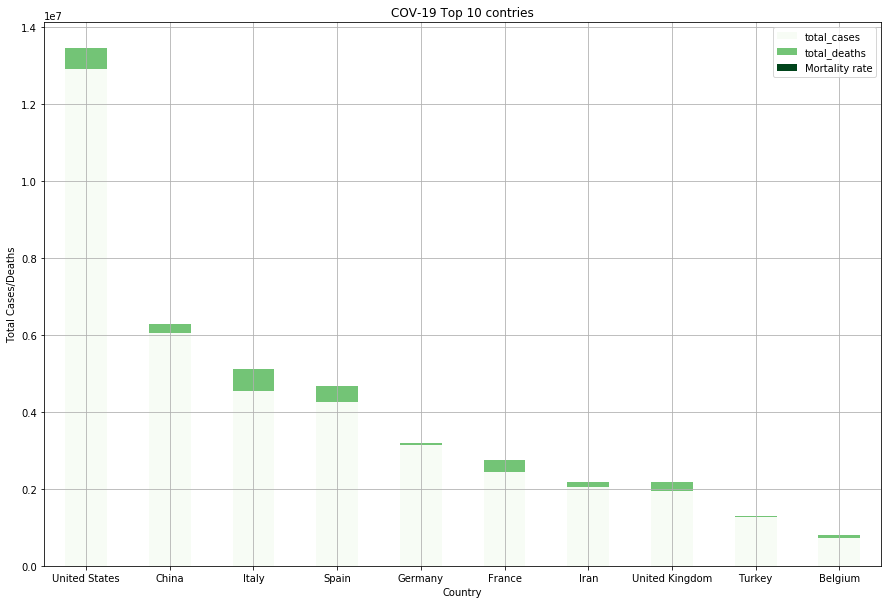

In [608]:
covid.groupby("location").sum().sort_values(by = "total_cases", axis = 0, ascending = False).head(10).plot(kind = "bar", stacked=True,  colormap='Greens', figsize = (15,10), title = "COV-19 Top 10 contries", grid = True, rot = 0)
plt.xlabel("Country")
plt.ylabel("Total Cases/Deaths")

In [631]:
#Take a dataframe with Date converted to Datetime format

covid1 = pd.DataFrame(covid_data_2, columns = ["date","total_cases", "total_deaths", "Year", "Month", "Day"])
covid1 = covid1.rename(columns={'date': 'TheDate'})
covid1.head()

,TheDate,total_cases,total_deaths,Year,Month,Day
date,,,,,,
2020-03-13,NaN,2,0,2020,3,NaN
2020-03-20,NaN,4,0,2020,3,NaN
2020-03-24,NaN,12,0,2020,3,NaN
2020-03-25,NaN,17,0,2020,3,NaN
2020-03-26,NaN,19,0,2020,3,NaN


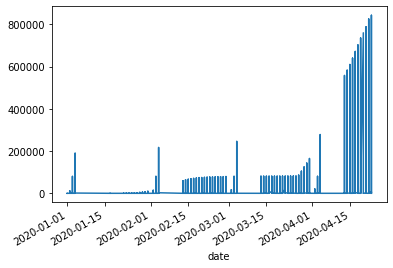

In [556]:
covid1.loc["2020-01-01":"2020-04-23", "total_cases"]

In [592]:
x = covid1.groupby("date").agg({"total_cases": "sum", "total_deaths" : "sum"})
x

,total_cases,total_deaths
date,,
2019-12-31,27,0
2020-01-01,27,0
2020-01-02,11946,259
2020-01-03,86321,2973
2020-01-04,850903,41897
...,...,...
2020-11-04,1652463,102081
2020-12-01,59,1
2020-12-02,45003,1115


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB2AB76AC0>],
      dtype=object)

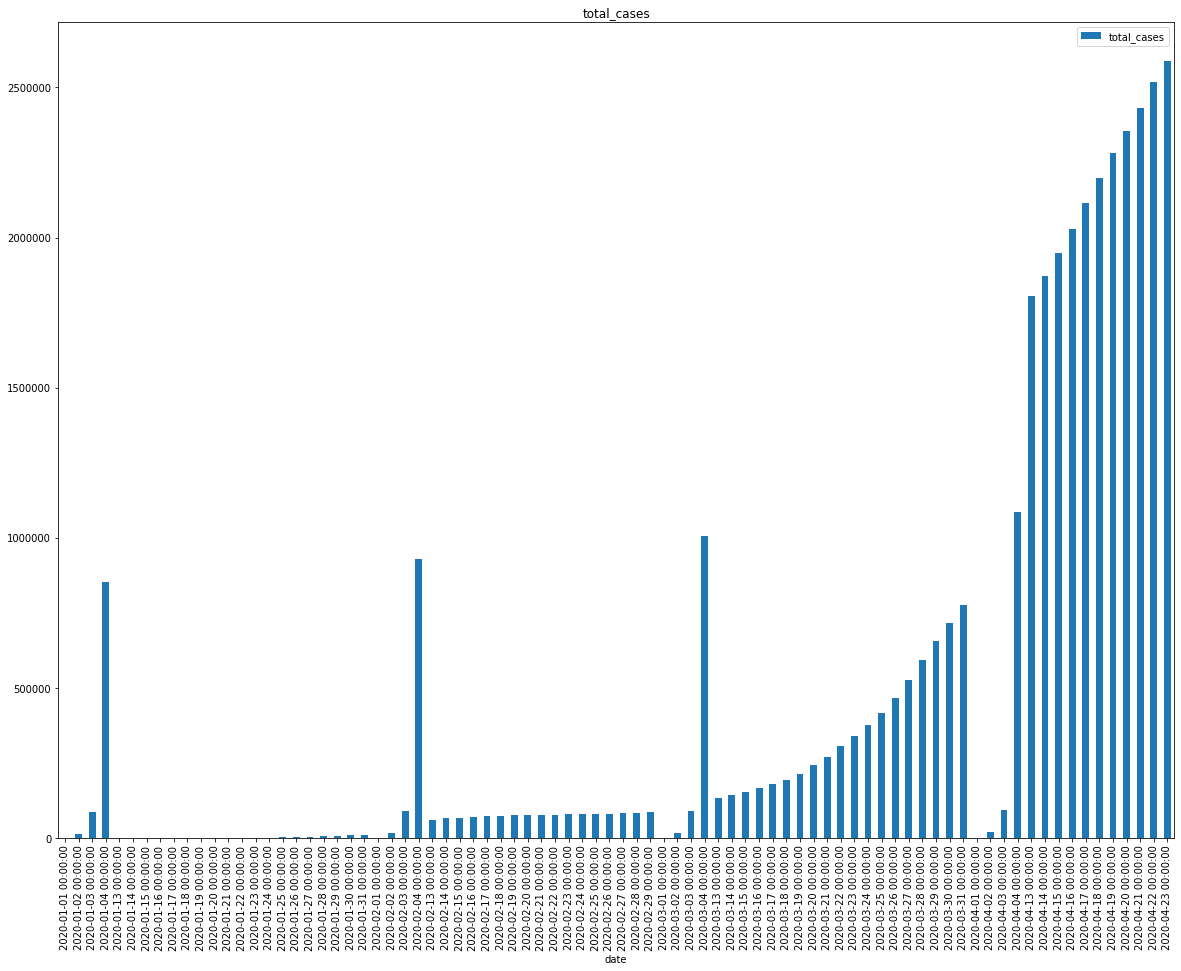

In [593]:
x.loc["2020-01-01":"2020-04-24"].plot(kind = "bar", subplots = True, figsize = (20,15), y= "total_cases")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB36AAC880>,
      dtype=object)

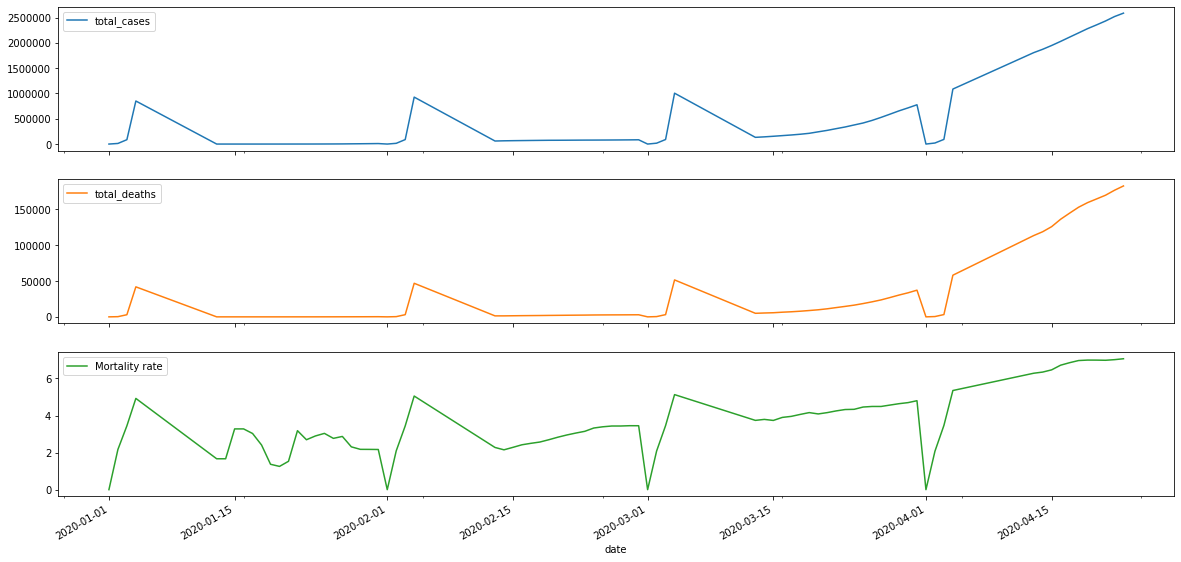

In [601]:
x.loc["2020-01-01":"2020-04-24"].plot(kind = "line", subplots = True, figsize = (20,10))

In [564]:
covid_data.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,ABW,Aruba,13/3/2020,2,2,0,0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,20/3/2020,4,2,0,0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,24/3/2020,12,8,0,0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,25/3/2020,17,5,0,0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,26/3/2020,19,2,0,0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,BEL,Belgium,9/3/2020,200,31,0,0,17.257,2.675,0.0,0.0,4508.0,549.0,0.388,0.047,tests performed
1014,BEL,Belgium,10/3/2020,239,39,0,0,20.622,3.365,0.0,0.0,5244.0,736.0,0.451,0.063,tests performed
1162,BGD,Bangladesh,5/3/2020,0,0,0,0,NaN,NaN,NaN,NaN,111.0,3.0,0.001,0.000,samples tested
1320,BHR,Bahrain,5/3/2020,52,3,0,0,30.560,1.763,0.0,0.0,5334.0,NaN,3.142,NaN,units unclear


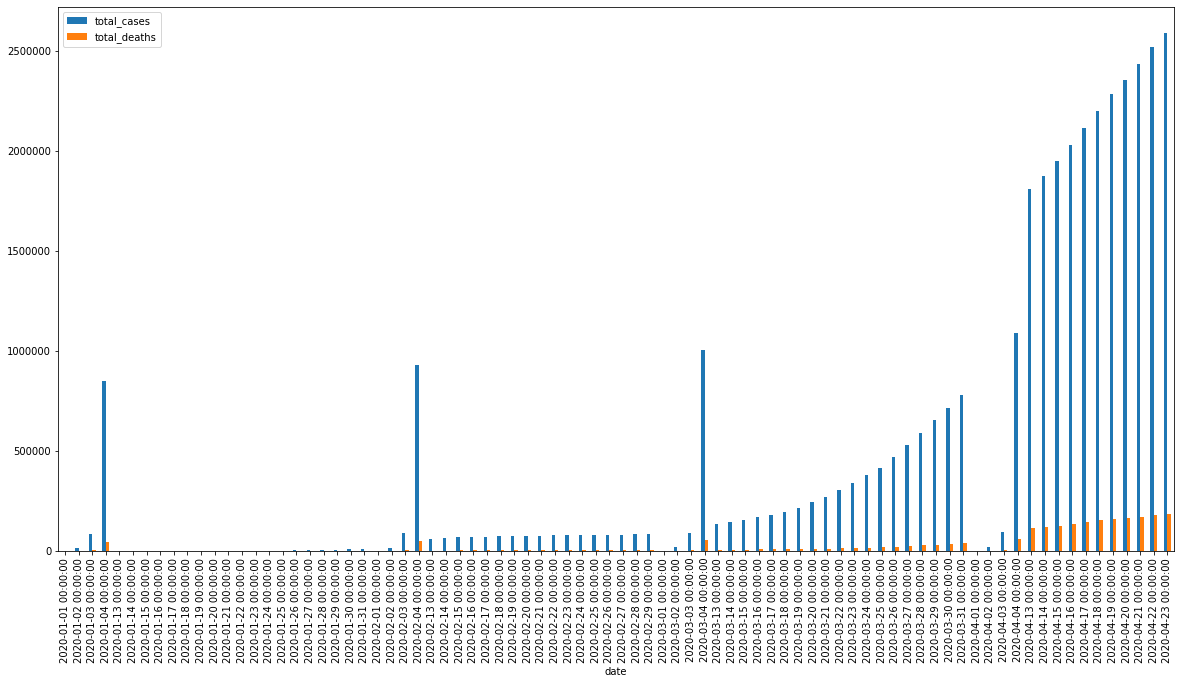

In [597]:
x.loc["2020-01-01":"2020-04-24"].plot(kind = "bar", subplots = False, figsize = (20,10))

In [599]:
x["Mortality rate"] = (x["total_deaths"]/x["total_cases"])*100
x["Mortality rate"].round()

date
2019-12-31    0.0
2020-01-01    0.0
2020-01-02    2.0
2020-01-03    3.0
2020-01-04    5.0
             ... 
2020-11-04    6.0
2020-12-01    2.0
2020-12-02    2.0
2020-12-03    4.0
2020-12-04    6.0
Name: Mortality rate, Length: 115, dtype: float64

In [635]:
a

,total_cases,total_deaths
location,,
Afghanistan,14593,445
Albania,12067,594
Algeria,46485,6064
Andorra,16037,632
Angola,433,50
...,...,...
Venezuela,5519,177
Vietnam,8696,0
Yemen,14,0


In [638]:
a["Mortality rate"] =  (a["total_deaths"]/a["total_cases"])*100
a = a.round()
a

,total_cases,total_deaths,Mortality rate
location,,,
Afghanistan,14593,445,3.0
Albania,12067,594,5.0
Algeria,46485,6064,13.0
Andorra,16037,632,4.0
Angola,433,50,12.0
...,...,...,...
Venezuela,5519,177,3.0
Vietnam,8696,0,0.0
Yemen,14,0,0.0


Text(0.5, 1.0, 'Top 15 countries by Mortality rate')

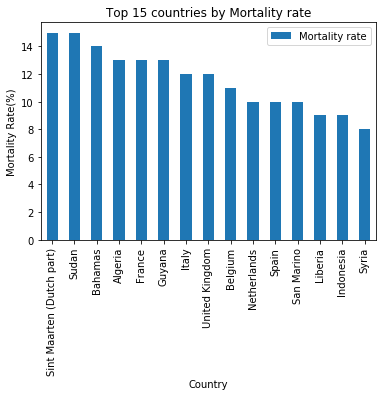

In [649]:
a[a["total_cases"] > 500].sort_values("Mortality rate", ascending = False).head(15).plot( y = "Mortality rate", kind = "bar")
plt.xlabel("Country")
plt.ylabel("Mortality Rate(%)")
plt.title("Top 15 countries by Mortality rate")